# G2 Searching with Geometry

Recall that a single Grover step consists in applying the oracle and then the diffusion operator:

```python
grover_op_matrix = np.dot(diffusion_matrix(), oracle_matrix(combo))
```

![](https://codebook.xanadu.ai/pics/grover-space.svg)

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

### Codercise G.2.1. 
Create a circuit which runs  some specified number of times, and manually set the step number my_steps. The results in the two-dimensional geometry will be displayed for combo = [0, 0, 0, 0, 0]. The oracle and diffusion matrices are defined below, and available by calling oracle_matrix(combo) and diffusion_matrix(). From the plots, confirm that applying the Grover operator rotates the state vector, and determine the optimal number of Grover steps for .

In [ ]:
n_bits = 5
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

def diffusion_matrix():
    """Return the diffusion matrix.

    Returns: 
        array[float]: The matrix representation of the diffusion operator.
    """
    psi_piece = (1/2**n_bits)*np.ones(2**n_bits)
    ident_piece = np.eye(2**n_bits)
    return (2*psi_piece - ident_piece)

@qml.qnode(dev)
def grover_circuit(combo, num_steps):
    """Apply the Grover operator num_steps times to the uniform superposition 
       and return the state.

    Args:
        combo (list[int]): A list of bits representing the secret combination.
        num_steps (int): The number of iterations of the Grover operator
            our circuit is to perform.

    Returns: 
        array[complex]: The quantum state (amplitudes) after repeated Grover 
        iterations.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for _ in range(n_bits):
	    qml.Hadamard(wires=_)
    for _ in range(num_steps):
	    qml.QubitUnitary(oracle_matrix(combo), wires = [i for i in range(n_bits)])
	    qml.QubitUnitary(diffusion_matrix(), wires = [i for i in range(n_bits)])

    return qml.state()

my_steps = 4 # YOUR STEP NUMBER HERE


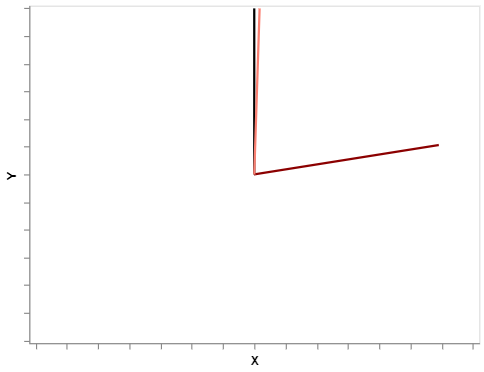

![](https://codebook.xanadu.ai/pics/rotate.gif)